In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Modeling non-linear relationship

In [3]:
data = pd.read_csv('AR - Examples - 1.6.csv')
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


<Axes: xlabel='number_courses', ylabel='Marks'>

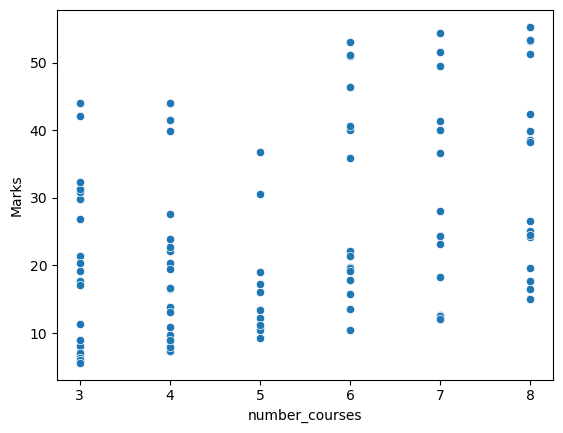

In [8]:
#Plotting a scatter plot
sns.scatterplot(data = data,x ='number_courses',y='Marks')

<Axes: xlabel='time_study', ylabel='Marks'>

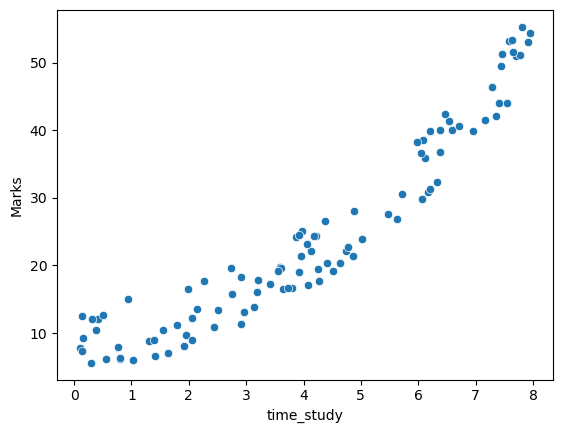

In [9]:
#Plotting a scatter plot
sns.scatterplot(data = data,x ='time_study',y='Marks')

In [10]:
#Splitting the dataset into X and y
X  = data[['number_courses','time_study']]
y = np.array(data['Marks']).reshape(-1,1)

In [11]:
#Building the regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [12]:
#Predictions
y_pred = reg.predict(X)

In [13]:
#Finding the value of r squared
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y,y_pred)

0.9403656320238896

In [14]:
#Calculate the beta0 and beta1
print(reg.intercept_)
reg.coef_

[-7.45634623]


array([[1.86405074, 5.39917879]])

In [15]:
#Metrics to give an overall sense of error in the model
rss =np.sum( np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

1211.6962069108954
12.116962069108954
3.480942698337471


In [16]:
#Residual analysisi
y_res = y-y_pred

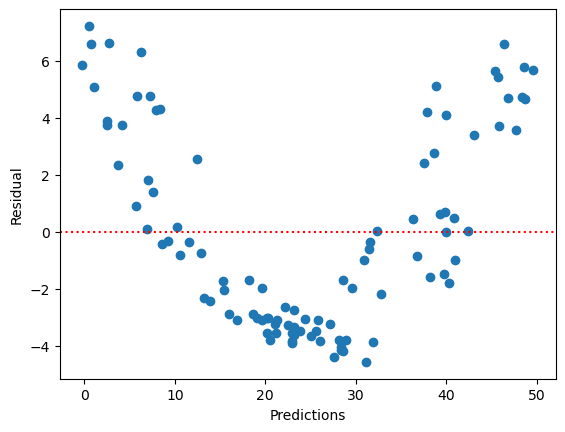

In [17]:
data['res'] = y_res
plt.scatter(y_pred,data['res'])
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.show()

### Checking for non-linearity of the predictor variables

In [19]:
data.columns

Index(['number_courses', 'time_study', 'Marks', 'res'], dtype='object')

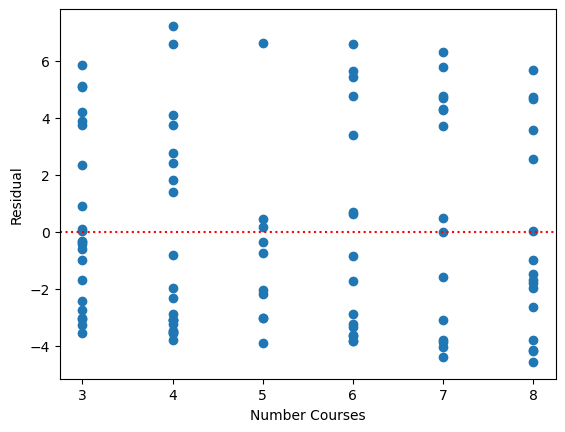

In [20]:
plt.scatter(data['number_courses'],data['res'])
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel('Number Courses')
plt.ylabel('Residual')
plt.show()

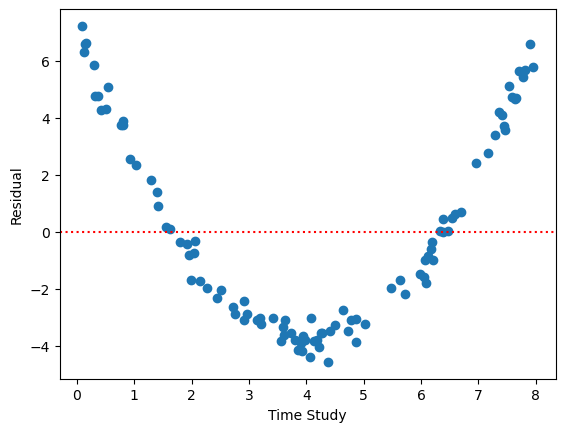

In [18]:
plt.scatter(data['time_study'],data['res'])
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel('Time Study')
plt.ylabel('Residual')
plt.show()

- Here we can clearly see that Time study variable is the problem since it shows a trend.

<function matplotlib.pyplot.show(close=None, block=None)>

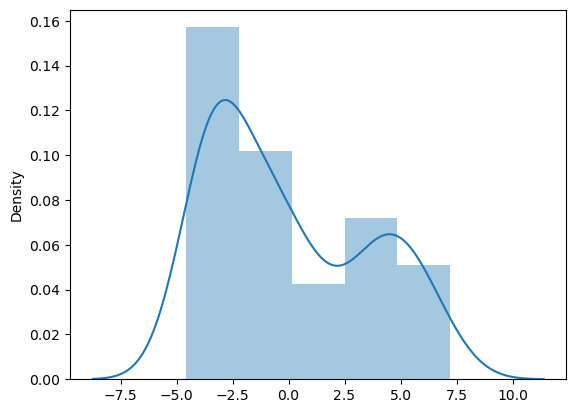

In [22]:
#Distribution of errors
import warnings
warnings.filterwarnings('ignore')
sns.distplot(y_res,kde=True)
plt.show

- This is a bi modal distribution.

### Fitting Polynomial Regression Model

In [25]:
#Transforming the time study variable
data['time_study_squared'] = data['time_study']**2

In [28]:
data.head()

,number_courses,time_study,Marks,res,time_study_squared
0,3,4.508,19.202,-3.273304,20.322064
1,4,0.096,7.734,7.215822,0.009216
2,4,3.133,13.811,-3.104484,9.815689
3,6,7.909,53.018,6.587937,62.552281
4,8,7.811,55.299,5.669955,61.011721


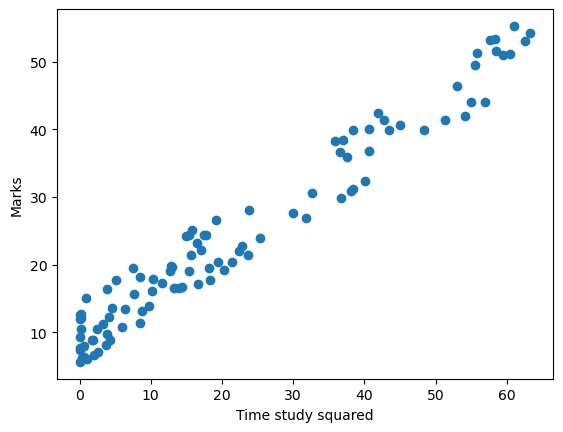

In [30]:
plt.scatter(data['time_study_squared'],data['Marks'])
plt.xlabel('Time study squared')
plt.ylabel('Marks')
plt.show()

In [31]:
#Splitting the dataset into X and y
X = data[['number_courses','time_study','time_study_squared']]
y = np.array(data['Marks']).reshape(-1,1)

In [32]:
#Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [33]:
#Predictions
y_pred= reg.predict(X)

In [34]:
#Find the r2_Score
r2_score(y,y_pred)

0.9996529294889802

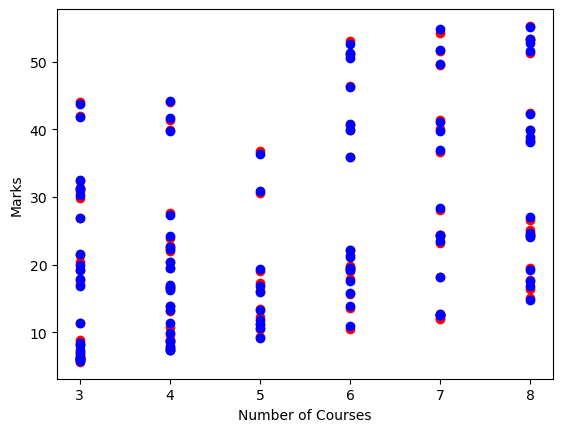

In [36]:
plt.scatter(data['number_courses'],data['Marks'],color='red')
plt.scatter(data['number_courses'],y_pred,color='blue')
plt.xlabel('Number of Courses')
plt.ylabel('Marks')
plt.show()

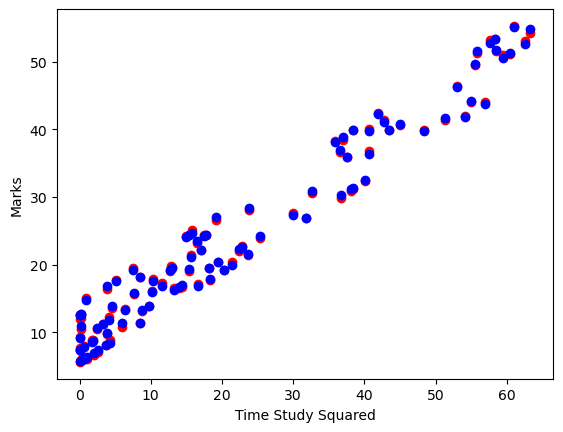

In [38]:
plt.scatter(data['time_study_squared'],data['Marks'],color='red')
plt.scatter(data['time_study_squared'],y_pred,color='blue')
plt.xlabel('Time Study Squared')
plt.ylabel('Marks')
plt.show()

In [39]:
#Calculate the beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[0.56299581]
[[ 1.70546941 -0.02855268  0.67346253]]


In [40]:
rss =np.sum(np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

7.052041230683781
0.07052041230683781
0.265556796762647


In [41]:
#Residual analysis
y_res = y-y_pred

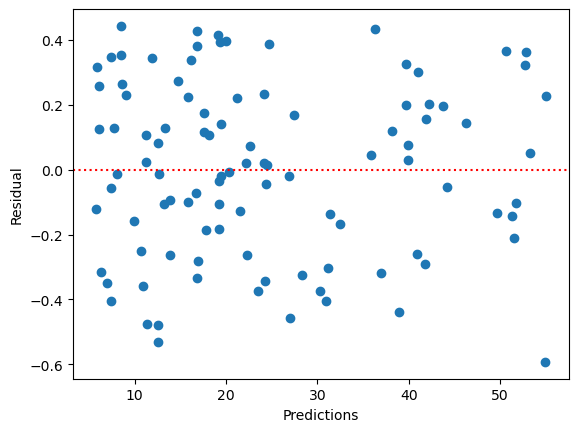

In [42]:
data['res']=y_res
plt.scatter(y_pred,data['res'])
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.show()

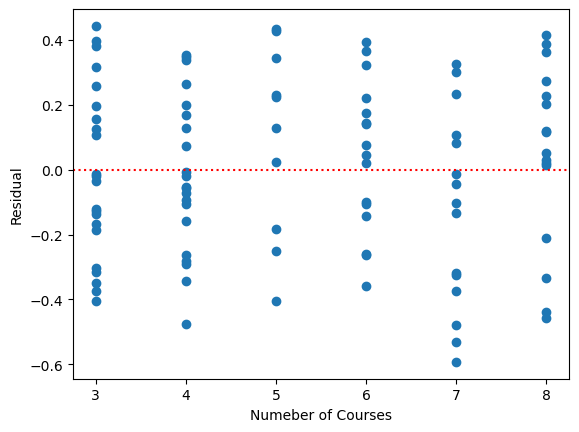

In [43]:
plt.scatter(data['number_courses'],data['res'])
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel('Numeber of Courses')
plt.ylabel('Residual')
plt.show()

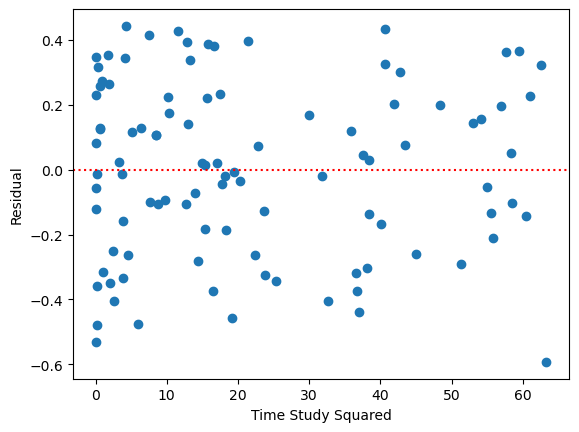

In [44]:
plt.scatter(data['time_study_squared'],data['res'])
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel('Time Study Squared')
plt.ylabel('Residual')
plt.show()

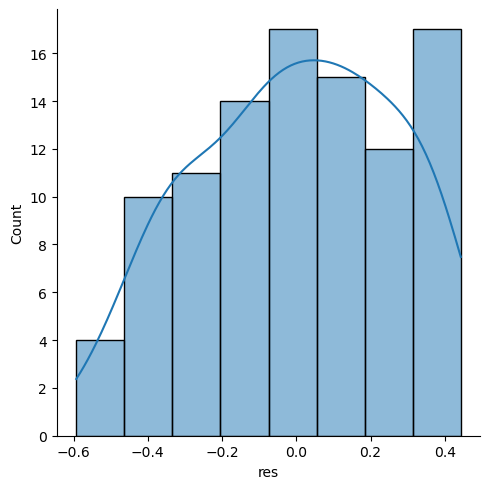

In [45]:
#Distribution of errors
sns.displot(data['res'],kde=True)
plt.show()

### Modeling non-linear relationships using data transformation 

In [46]:
dist = pd.read_csv('AR - Examples - 1.5.csv')
dist.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


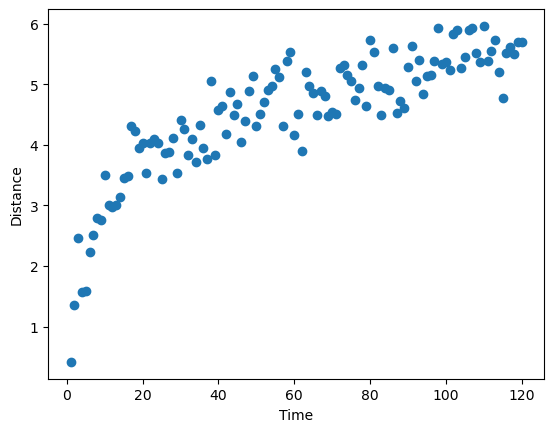

In [48]:
#Plotting a scatter plot
plt.scatter(dist['time'],dist['distance'])
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

In [49]:
#Splitting the dataset into X and y
X = np.array(dist['time']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [50]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [51]:
#Predictions
y_pred = model.predict(X)

In [52]:
r2_score(y,y_pred)

0.7019700219367477

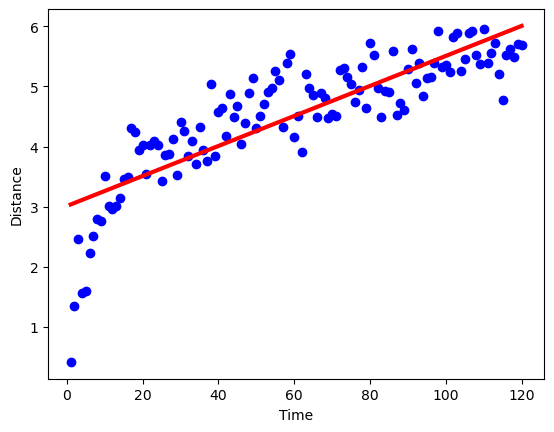

In [59]:
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,color='red',linewidth= 3)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

In [60]:
#Calculate the coefficients
print(model.coef_)
print(model.intercept_)

[[0.02494362]]
[3.01233335]


In [61]:
rss =np.sum(np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

38.03580844870773
0.3169650704058978
0.5629965101187553


In [62]:
#residual
residual = y-y_pred

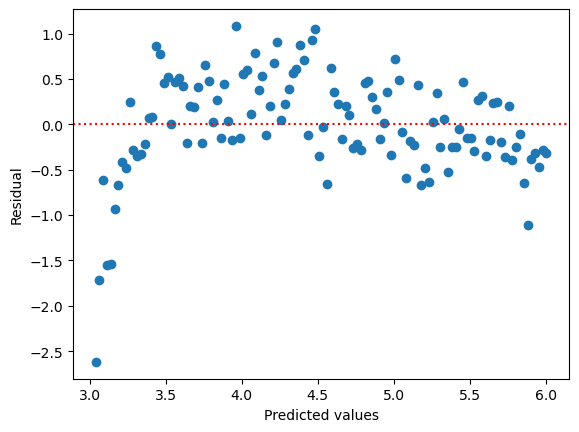

In [65]:
#Scatter plot of the predicted vs residual
plt.scatter(y_pred,residual)
plt.axhline(y=0,color='red',linestyle=':')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.show()

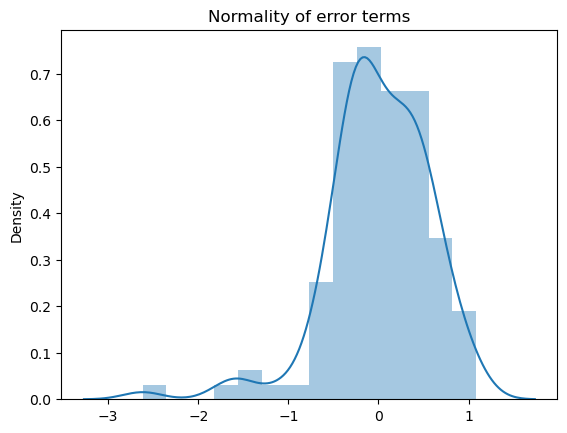

In [68]:
#Distribution of errors
sns.distplot(residual)
plt.title('Normality of error terms')
plt.show()

- Since there is a left skewness we cannot this model as good with this predictor variable.

In [70]:
#Data Transformation
dist['time(seconds)(log)']=np.log(dist['time'])

In [71]:
dist['time(seconds)(log)']

0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
115    4.753590
116    4.762174
117    4.770685
118    4.779123
119    4.787492
Name: time(seconds)(log), Length: 120, dtype: float64

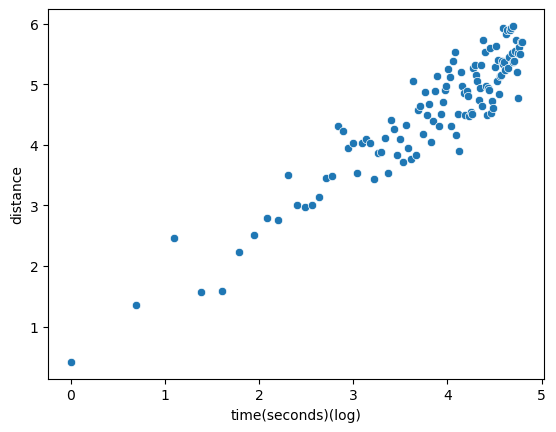

In [72]:
#Plotting a scatter plot
sns.scatterplot(data=dist,x='time(seconds)(log)',y='distance')
plt.show()

### We can see now log transformed time variable is linearly related to distance

In [73]:
#Splitting the dataset into X and y
X = np.array(dist['time(seconds)(log)']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [74]:
#Building the regression model
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [75]:
#Predictions on the basisi of model
y_pred2= model.predict(X)

In [76]:
r2_score(y,y_pred2)

0.8717123012103077

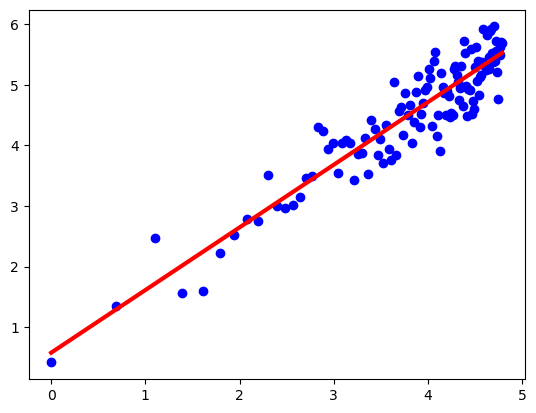

In [78]:
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred2,color='red',linewidth=3)
plt.show()

In [79]:
#Calculate the coefficients
print(model.intercept_)
model.coef_

[0.58066733]


array([[1.03293534]])

In [80]:
rss =np.sum(np.square(y-y_pred2))
print(rss)
mse = mean_squared_error(y,y_pred2)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

16.3726024113408
0.13643835342784
0.36937562646693406


In [81]:
#residuals
residual=y-y_pred2

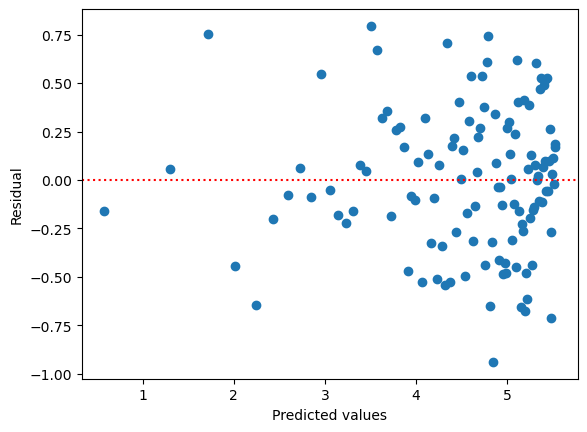

In [82]:
#Scatter plot of the predicted vs residual
plt.scatter(y_pred2,residual)
plt.axhline(y=0,color='red',linestyle=':')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.show()

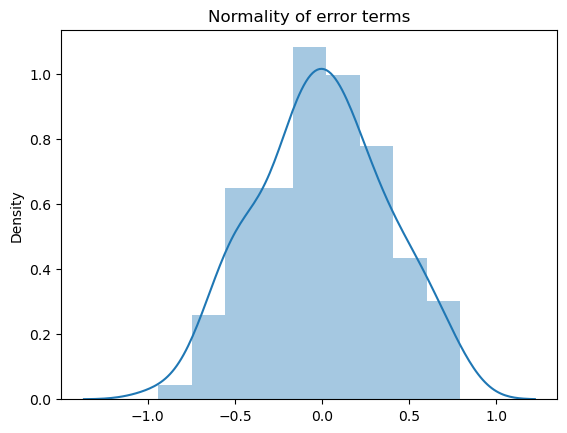

In [83]:
#Distribution of errors
sns.distplot(residual)
plt.title('Normality of error terms')
plt.show()